In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [5]:
# load data(only train)
train = pd.read_csv('dataset/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train['datetime']=pd.to_datetime(train['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


# 0. Null check

In [8]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

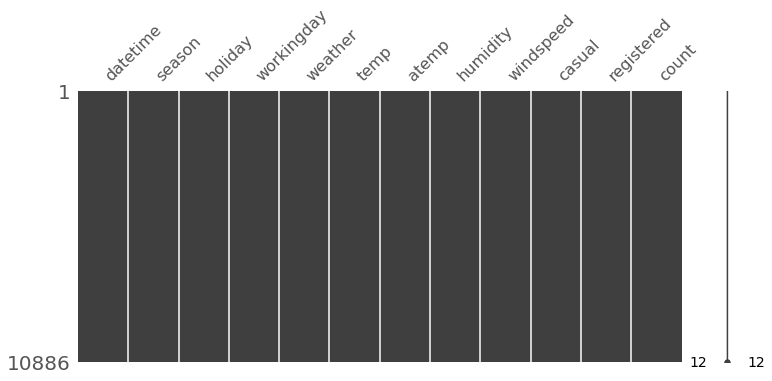

In [12]:
import missingno as msno
msno.matrix(train, figsize=(12,5))
plt.show()

### Datetime

In [14]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


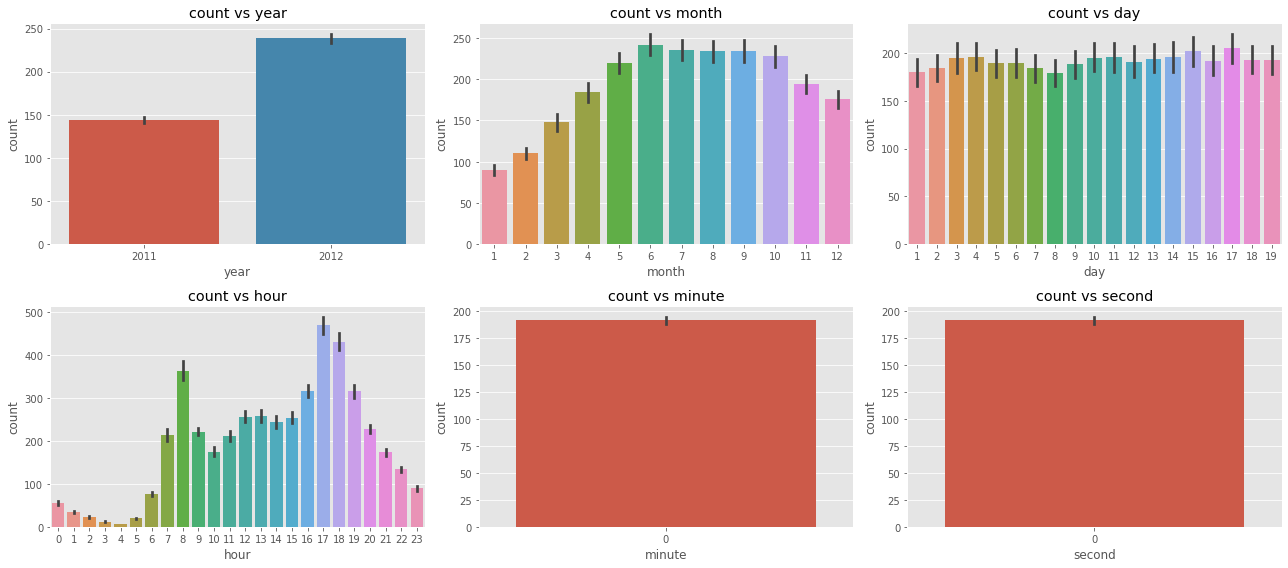

In [18]:
f, ax = plt.subplots(2, 3, figsize=(18,8))

sns.barplot(y='count', x='year', data=train, ax= ax[0,0])
sns.barplot(y='count', x='month', data=train, ax= ax[0,1])
sns.barplot(y='count', x='day',data=train, ax= ax[0,2])

sns.barplot(y='count', x='hour', data=train, ax= ax[1,0])
sns.barplot(y='count', x='minute', data=train, ax= ax[1,1])
sns.barplot(y='count', x='second', data=train, ax= ax[1,2])


ax[0,0].set(title='count vs year')
ax[0,1].set(title='count vs month')
ax[0,2].set(title='count vs day')
ax[1,0].set(title='count vs hour')
ax[1,1].set(title='count vs minute')
ax[1,2].set(title='count vs second')

plt.tight_layout()
plt.show()

- 연도별 대여량은 2011년 보다 2012년이 많다(의미 있는 feature)
- 월별 대여량은 6월에 가장 많고 7~10월도 대여량이 많다. 1월이 가장 적다 (의미 있는 feature)
- 일별대여량은 1일부터 19일까지만 있고 나머지는 test.csv에 있다(사용 불가 데이터)
- 시간 대 대여량은 출퇴근 시간에 대여량이 많은 것 같다.(의미 있는 feature)
- 주말과 평일을 나누어 봐야할거 같음
- 분, 초는 다 0이다(사용 불가 데이터)

$\rightarrow$ year, month, hour are selected for feature in ml

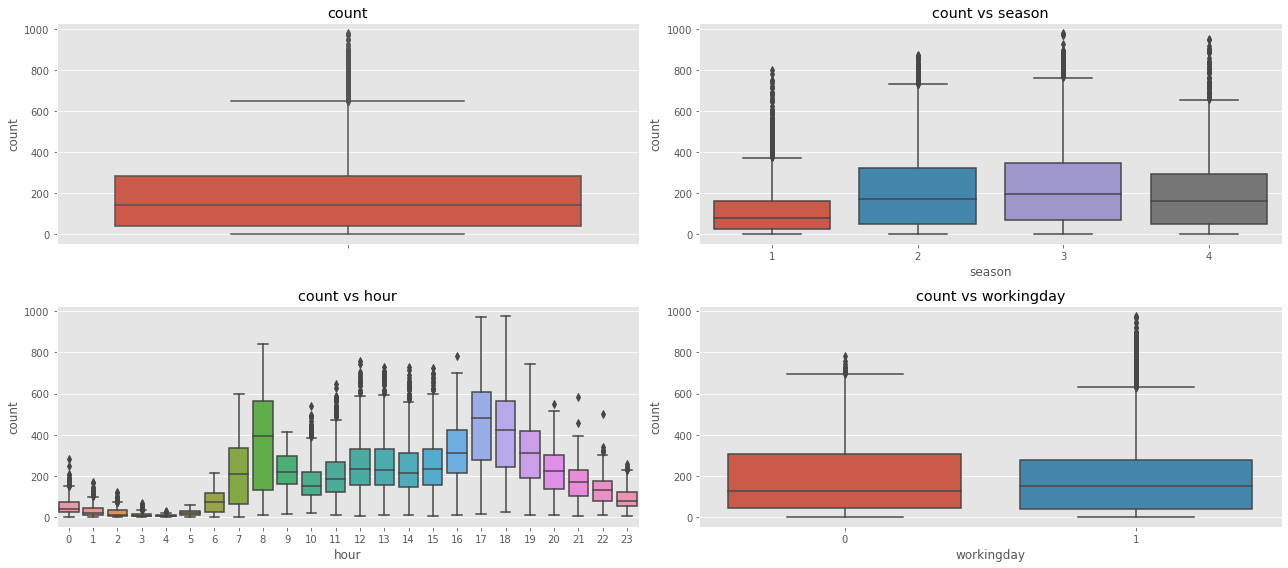

In [21]:
f, ax = plt.subplots(2, 2, figsize=(18,8))

sns.boxplot(y='count', data=train, ax= ax[0,0])
sns.boxplot(y='count', x='season', data=train, ax= ax[0,1])
sns.boxplot(y='count', x='hour',data=train, ax= ax[1,0])
sns.boxplot(y='count', x='workingday', data=train, ax= ax[1,1])



ax[0,0].set(title='count')
ax[0,1].set(title='count vs season')
ax[1,0].set(title='count vs hour')
ax[1,1].set(title='count vs workingday')


plt.tight_layout()
plt.show()

In [22]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [23]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

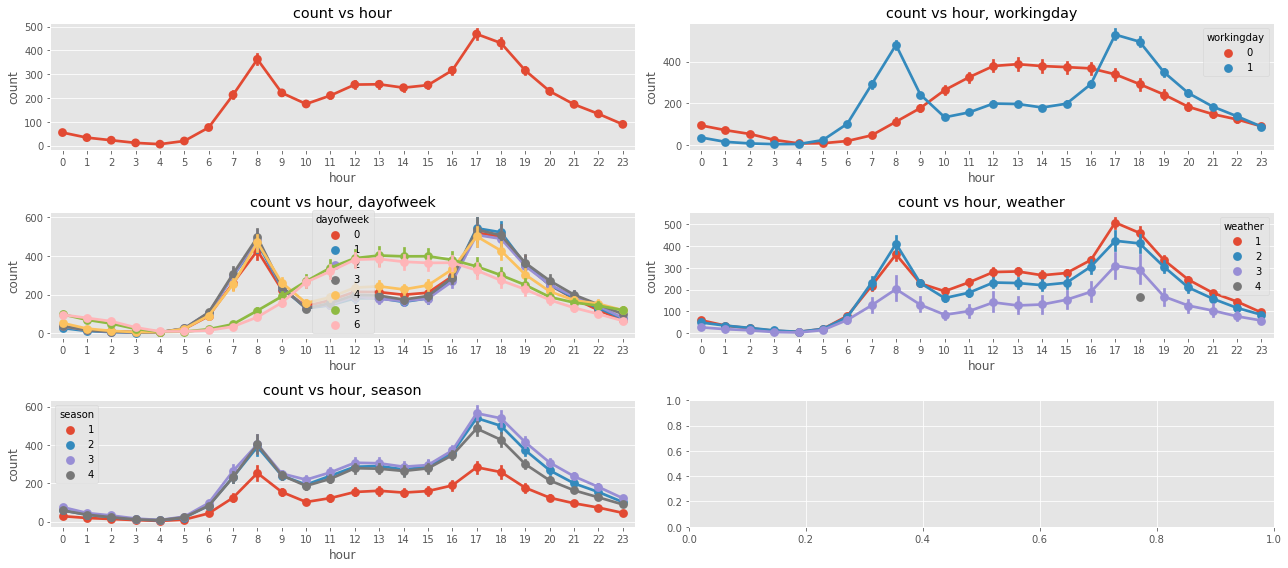

In [24]:
f, ax = plt.subplots(3, 2, figsize=(18,8))

sns.pointplot(y='count', x='hour', data=train, ax= ax[0,0])
sns.pointplot(y='count', x='hour', hue = 'workingday', data=train, ax= ax[0,1])
sns.pointplot(y='count', x='hour', hue ='dayofweek', data=train, ax= ax[1,0])
sns.pointplot(y='count', x='hour', hue='weather', data=train, ax= ax[1,1])
sns.pointplot(y='count', x='hour', hue='season', data=train, ax= ax[2,0])



ax[0,0].set(title='count vs hour')
ax[0,1].set(title='count vs hour, workingday')
ax[1,0].set(title='count vs hour, dayofweek')
ax[1,1].set(title='count vs hour, weather')
ax[2,0].set(title='count vs hour, season')

plt.tight_layout()
plt.show()

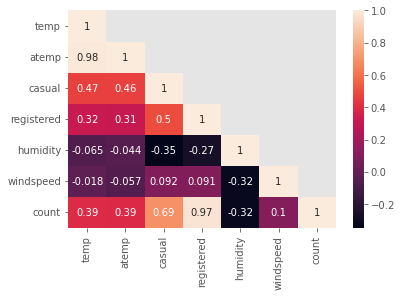

In [39]:
corr = train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corr = corr.corr('pearson')

mask = np.array(corr)
mask[np.tril_indices_from(mask)]=False
sns.heatmap(corr, mask=mask, annot=True)
plt.show()

- 온도, 습도, 풍속은 거의 연관관계가 없다
- 대여량과 가장 연관관계가 높은 것은 casual, registered이지만 이는 target...
- temp와 atemp는 거의 같은 데이터로 같이 사용하지말자

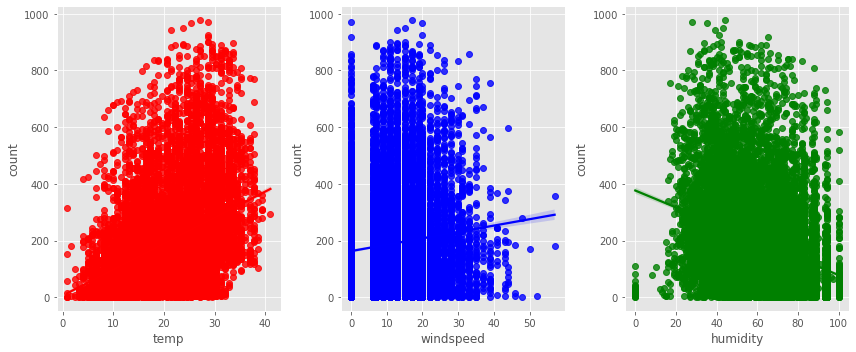

In [41]:
f, ax = plt.subplots(1, 3, figsize=(12,5))

sns.regplot(y='count', x='temp', data=train, ax=ax[0], color='red')
sns.regplot(y='count', x='windspeed', data=train, ax=ax[1], color='blue')
sns.regplot(y='count', x='humidity', data=train, ax=ax[2], color='green')

plt.tight_layout()
plt.show()

- 풍속에 과하게 0이 많이 있는것을 확인할 수 있다. 결측값으로 예상된다.

In [44]:
def concatenate_year_month(datetime):
    return "{0}_{1}".format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)
train[['datetime', 'year_month']].head()

,datetime,year_month
0,2011-01-01 00:00:00,2011_1
1,2011-01-01 01:00:00,2011_1
2,2011-01-01 02:00:00,2011_1
3,2011-01-01 03:00:00,2011_1
4,2011-01-01 04:00:00,2011_1


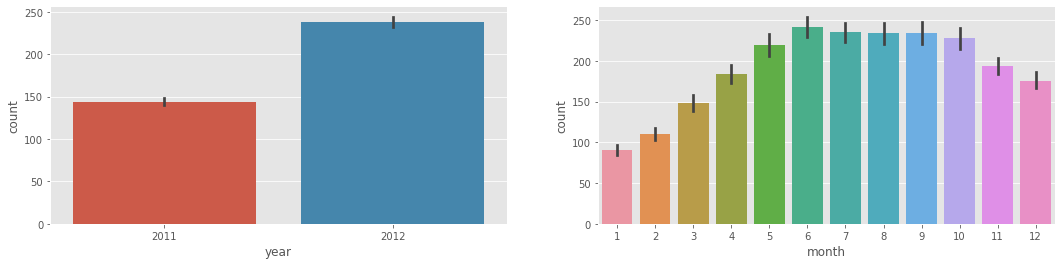

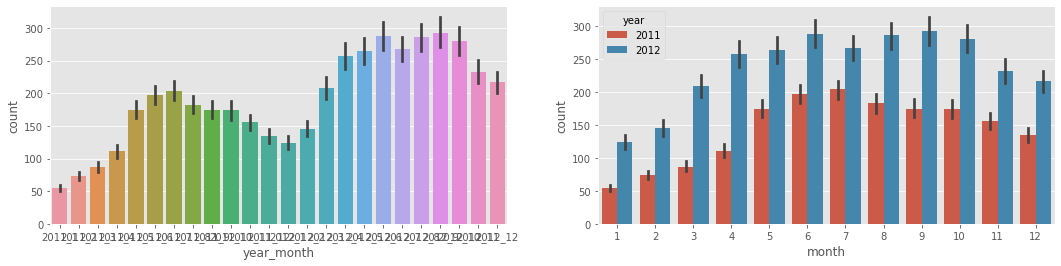

In [51]:
f, ax = plt.subplots(1,2, figsize=(18,4))

sns.barplot(y='count', x='year', data=train, ax=ax[0])
sns.barplot(y='count', x='month', data=train, ax=ax[1])

f, ax = plt.subplots(1,2, figsize=(18,4))
sns.barplot(y='count', x='year_month', data=train, ax=ax[0])
sns.barplot(y='count', x='month', hue='year', data=train, ax=ax[1])

plt.show()

- 2011년보다 2012년의 대여량이 더 많다
- 겨울보다는 여름이 대여량이 많다
- 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가 추세이다

<AxesSubplot:xlabel='count', ylabel='Density'>

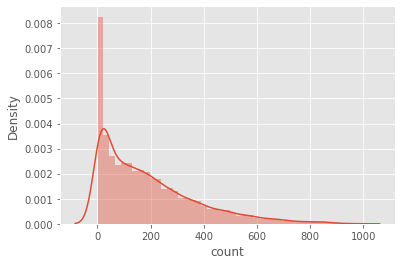

In [60]:
sns.distplot(train['count'])